In [7]:
import pandas as pd
import numpy as np

# Load the data from the Excel file
input_file = 'BM2425.xlsx'  # Replace with your input file name
data = pd.read_excel(input_file)

# Ensure the necessary columns are present
required_columns = {'playerName', 'x', 'y', 'endX', 'endY'}
if not required_columns.issubset(data.columns):
    raise ValueError(f"Input file must contain the following columns: {required_columns}")

# Define a function to calculate pass direction
def calculate_direction(start_x, start_y, end_x, end_y):
    dx = end_x - start_x
    dy = end_y - start_y

    if dx == 0 and dy == 0:
        return 'stationary'
    elif dx == 0:
        return 'lateral'
    elif dy == 0:
        return 'back' if dx < 0 else 'forward'
    elif dx < 0 and dy < 0:
        return 'back'
    elif dx > 0 and dy > 0:
        return 'forward'
    else:
        return 'diagonal'

# Apply the direction calculation to each row
data['direction'] = data.apply(lambda row: calculate_direction(row['x'], row['y'], row['endX'], row['endY']), axis=1)

# Group by playerName and count the occurrences of each direction
direction_counts = data.groupby(['playerName', 'direction']).size().unstack(fill_value=0)

# Save the result to a new Excel file
output_file = 'pass_directions_summary.xlsx'
direction_counts.to_excel(output_file)

print(f"Pass direction analysis has been saved to {output_file}")


Pass direction analysis has been saved to pass_directions_summary.xlsx


In [9]:
import pandas as pd
import numpy as np

# Load the data from the Excel file
input_file = 'BM2425.xlsx'  # Replace with your input file name
data = pd.read_excel(input_file)

# Ensure the necessary columns are present
required_columns = {'playerName', 'x', 'y', 'endX', 'endY'}
if not required_columns.issubset(data.columns):
    raise ValueError(f"Input file must contain the following columns: {required_columns}")

# Define a function to calculate pass direction
def calculate_direction(start_x, start_y, end_x, end_y):
    dx = end_x - start_x
    dy = end_y - start_y

    if dx == 0 and dy == 0:
        return 'stationary'
    elif dx == 0:
        return 'lateral'
    elif dy == 0:
        return 'back' if dx < 0 else 'forward'
    elif dx < 0 and dy < 0:
        return 'back'
    elif dx > 0 and dy > 0:
        return 'forward'
    else:
        return 'diagonal'

# Apply the direction calculation to each row
data['direction'] = data.apply(lambda row: calculate_direction(row['x'], row['y'], row['endX'], row['endY']), axis=1)

# Group by playerName and count the occurrences of each direction
direction_counts = data.groupby(['playerName', 'direction']).size().unstack(fill_value=0)

# Calculate z-scores for each direction
z_scores = (direction_counts - direction_counts.mean()) / direction_counts.std()

# Define weights for each direction
weights = {
    'forward': 1.5,
    'back': 1.0,
    'lateral': 1.2,
    'diagonal': 1.3,
    'stationary': 0.8
}

# Apply weights to z-scores
for direction, weight in weights.items():
    if direction in z_scores.columns:
        z_scores[direction] *= weight

# Assign roles based on weighted z-scores
roles = []
for _, row in z_scores.iterrows():
    role_scores = {
        'Playmaker': row.get('forward', 0) + row.get('diagonal', 0),
        'Defender': row.get('back', 0) + row.get('lateral', 0),
        'Support': row.get('stationary', 0) + row.get('lateral', 0),
        'Attacker': row.get('forward', 0) * 1.2 + row.get('diagonal', 0) * 1.1
    }
    roles.append(max(role_scores, key=role_scores.get))

z_scores['role'] = roles

# Save the result to a new Excel file
output_file = 'pass_directions_with_roles.xlsx'
z_scores.to_excel(output_file)

print(f"Pass direction analysis with roles has been saved to {output_file}")


Pass direction analysis with roles has been saved to pass_directions_with_roles.xlsx


/var/folders/68/mhmqcpdn52943pyql2n4wj440000gn/T/ipykernel_76170/3794373846.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  z_scores['total_score'] = z_scores.sum(axis=1)


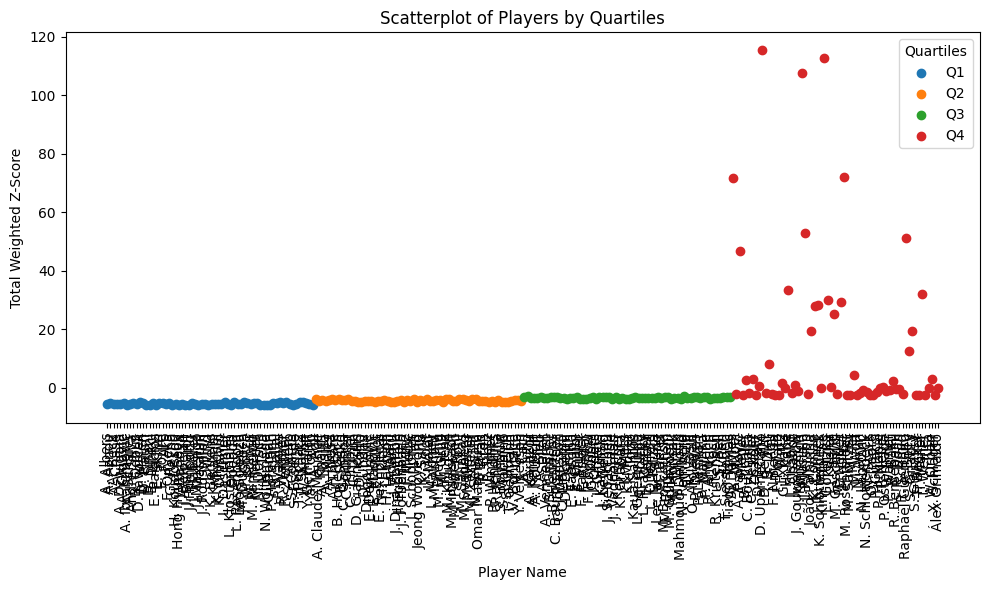

In [13]:
import matplotlib.pyplot as plt

z_scores['role'] = roles

# Create a scatterplot for the quartiles of z-scores
z_scores['total_score'] = z_scores.sum(axis=1)
z_scores['quartile'] = pd.qcut(z_scores['total_score'], 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

plt.figure(figsize=(10, 6))
for quartile, group_data in z_scores.groupby('quartile'):
    plt.scatter(group_data.index, group_data['total_score'], label=f"{quartile}")

plt.title("Scatterplot of Players by Quartiles")
plt.xlabel("Player Name")
plt.ylabel("Total Weighted Z-Score")
plt.legend(title="Quartiles")
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig("quartile_scatterplot.png")
plt.show()




